In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import datetime

In [2]:
categories_text = open('/content/drive/My Drive/category_mini.txt','r')
categories = categories_text.readlines()
categories_text.close()

In [3]:
categories = [c.replace('\n', '').replace(' ','_').replace("'", "").replace(',', '') for c in categories]

In [4]:
!mkdir npy

mkdir: cannot create directory ‘npy’: File exists


In [5]:
cat_limit = categories[:25]

In [6]:
import urllib.request


def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  counter = 1
  for i in cat_limit:
    space = i.replace('_', '%20')
    path = base+space+'.npy'
    print(f'{path} {counter}/{len(cat_limit)}')
    counter += 1
    urllib.request.urlretrieve(path, 'npy/'+i+'.npy')

In [7]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy 1/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy 2/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bear.npy 3/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bee.npy 4/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy 5/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/butterfly.npy 6/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy 7/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy 8/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cow.npy 9/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crab.npy 10/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crocodile.npy 11/25
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy 12/25
https://storage.goog

In [8]:
all_files = glob.glob(os.path.join('npy', '*.npy'))
all_files

['npy/cat.npy',
 'npy/ant.npy',
 'npy/dragon.npy',
 'npy/crab.npy',
 'npy/lion.npy',
 'npy/bat.npy',
 'npy/butterfly.npy',
 'npy/flamingo.npy',
 'npy/lobster.npy',
 'npy/bee.npy',
 'npy/giraffe.npy',
 'npy/fish.npy',
 'npy/horse.npy',
 'npy/duck.npy',
 'npy/cow.npy',
 'npy/dog.npy',
 'npy/bird.npy',
 'npy/hedgehog.npy',
 'npy/kangaroo.npy',
 'npy/elephant.npy',
 'npy/crocodile.npy',
 'npy/dolphin.npy',
 'npy/frog.npy',
 'npy/camel.npy',
 'npy/bear.npy']

In [9]:
X = np.empty([0, 784])
y = np.empty([0])
label_names = []

for idx, file in enumerate(all_files):
  data = np.load(file)
  data = data[0: 25000, :]
  labels = np.full(data.shape[0], idx)


  X = np.concatenate((X, data), axis=0)
  y = np.append(y, labels)
  
  label_name, extension = os.path.splitext(os.path.basename(file))
  label_names.append(label_name)

In [10]:
y.shape

(625000,)

472441
kangaroo


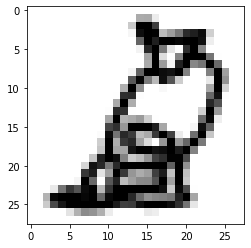

In [11]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(label_names[int(y[idx].item())])


In [12]:
y.shape

(625000,)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)

In [15]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [16]:
X_train = tf.reshape(X_train,[-1,28,28])
X_test = tf.reshape(X_test,[-1,28,28])
X_train = tf.expand_dims(X_train, 3)
X_test = tf.expand_dims(X_test, 3)


In [17]:
y_train[100]

14.0

In [18]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(label_names))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(label_names))


In [19]:
y_test.shape

(125000, 25)

In [21]:
model = keras.Sequential()
model.add(layers.Convolution2D(256, (3,3),
                              padding='same',
                              input_shape=X_train.shape[1:], 
                              activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.Convolution2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Convolution2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(len(cat_limit), activation='softmax'))

adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       590080    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         1

In [22]:
# Clear out prior logging data.
!rm -rf logs/image

logdir = "logs/image/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

In [23]:
test_pred_raw = model.predict(X_test)
test_pred = np.argmax(test_pred_raw, axis=1)
print(y_test.shape, test_pred.shape)
# test_pred_test.shape
# cm = plot_confusion_matrix(y_test, X_test)

(125000, 25) (125000,)


In [29]:
%load_ext tensorboard
import sklearn.metrics

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs/image

model.fit(x=X_train, 
          y=y_train, 
          batch_size=256, 
          validation_split=0.1, 
          verbose=2, 
          epochs=5, 
          callbacks=[tensorboard_callback],
          validation_data=(X_test, y_test),
)

Reusing TensorBoard on port 6006 (pid 334), started 0:56:12 ago. (Use '!kill 334' to kill it.)

<IPython.core.display.Javascript object>

In [27]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

3907/3907 [==============================] - 21s 5ms/step - loss: 0.8468 - accuracy: 0.7532
Test accuracy: 75.32%


223572
lobster


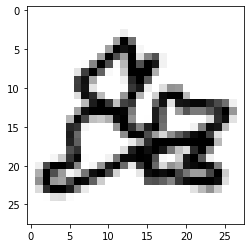

In [28]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(label_names[int(y[idx].item())])


In [ ]:
# !pip install tensorflowjs

In [ ]:
# with open('class_names25.txt', 'w') as file_handler:
#   for item in cat_limit:
#     file_handler.write(f'{item}')

In [ ]:
# model.save('keras25.h5')

In [ ]:
# !mkdir model

In [ ]:
# !tensorflowjs_converter --input_format keras keras25.h5 model/

In [ ]:
# !cp class_names25.txt model/class_names25.txt

In [ ]:
# !zip -r model25.zip model

In [ ]:
# from google.colab import files
# files.download('model25.zip')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
model25 = tf.keras.models.load_model('./model25/keras25.h5')

In [ ]:
rand = np.floor(np.random.random((28,28)) + .5)
all_black = np.full((28,28, 3), 0)
all_white = np.ones((28,28))
diag = np.eye(28)
diag_low = np.eye(28, k=-15)
diag_high = np.eye(28, k=15)

plt.subplot(231)
plt.imshow(all_white, cmap='binary')
plt.subplot(232)
plt.imshow(rand, cmap='binary')
plt.subplot(233)
plt.imshow(all_black, cmap='binary')
plt.subplot(234)
plt.imshow(diag_low, cmap='binary')
plt.subplot(235)
plt.imshow(diag, cmap='binary')
plt.subplot(236)
plt.imshow(diag_high, cmap='binary')

In [ ]:
first6 = cat_limit[:6]
first6

In [ ]:
dummy_files = glob.glob(os.path.join('npy', '*.npy'))
dummy_data = []
for index, file in enumerate(dummy_files):
  test_data = np.load(file)
  dummy_data.append(test_data[:])

You can change which category of doodles by changing the index number of dummy_data below.

In [ ]:
category_array = np.array(dummy_data[0])
category_array.shape

Set up to take select a random image from the corresponding category and reshapes it so it is plot-able.

Feel free to select your own index if you prefer.

In [ ]:
plot_me = category_array[random.randrange(len(category_array[0]))]
plot_me = plot_me.reshape(28,28)

In [ ]:
plt.imshow(plot_me, cmap='binary')

In [ ]:
butterfly = dummy_files[1]

In [ ]:
butterfly_data = np.load(butterfly)
butterfly_data.shape

In [ ]:
predict_me = plot_me.reshape(1,28,28,1)

In [ ]:
prediction_single = model.predict(predict_me)
print(prediction_single)

In [ ]:
np.argmax(prediction_single[0])